In [184]:
library('tidyverse')
library('plotly')


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [2]:
df = read_csv('https://raw.githubusercontent.com/the-tanvan/BIOS512/master/course-project/Pokemon.csv')
df %>% head(5)

Parsed with column specification:
cols(
  `#` = col_double(),
  Name = col_character(),
  `Type 1` = col_character(),
  `Type 2` = col_character(),
  Total = col_double(),
  HP = col_double(),
  Attack = col_double(),
  Defense = col_double(),
  `Sp. Atk` = col_double(),
  `Sp. Def` = col_double(),
  Speed = col_double(),
  Generation = col_double(),
  Legendary = col_logical()
)



#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,Charmander,Fire,NA,309,39,52,43,60,50,65,1,FALSE


In [21]:
# Removed duplicates
df = distinct(df, `#`, .keep_all = TRUE)
df %>% head(5)

#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
4,Charmander,Fire,NA,309,39,52,43,60,50,65,1,FALSE
5,Charmeleon,Fire,NA,405,58,64,58,80,65,80,1,FALSE


In [107]:
df.long = df %>%
    pivot_longer(cols = -one_of("#", "Name", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", 
                                "Legendary"), names_to = 'Type Number', values_to = 'Type') %>%
    filter(Type != "NA") %>%
    mutate(Type=fct_lump(Type, n=19)) %>%
    mutate(Type=fct_infreq(Type))
                 
df.long %>% head(10)

#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type Number,Type
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<fct>
1,Bulbasaur,318,45,49,49,65,65,45,1,FALSE,Type 1,Grass
1,Bulbasaur,318,45,49,49,65,65,45,1,FALSE,Type 2,Poison
2,Ivysaur,405,60,62,63,80,80,60,1,FALSE,Type 1,Grass
2,Ivysaur,405,60,62,63,80,80,60,1,FALSE,Type 2,Poison
3,Venusaur,525,80,82,83,100,100,80,1,FALSE,Type 1,Grass
3,Venusaur,525,80,82,83,100,100,80,1,FALSE,Type 2,Poison
4,Charmander,309,39,52,43,60,50,65,1,FALSE,Type 1,Fire
5,Charmeleon,405,58,64,58,80,65,80,1,FALSE,Type 1,Fire
6,Charizard,534,78,84,78,109,85,100,1,FALSE,Type 1,Fire


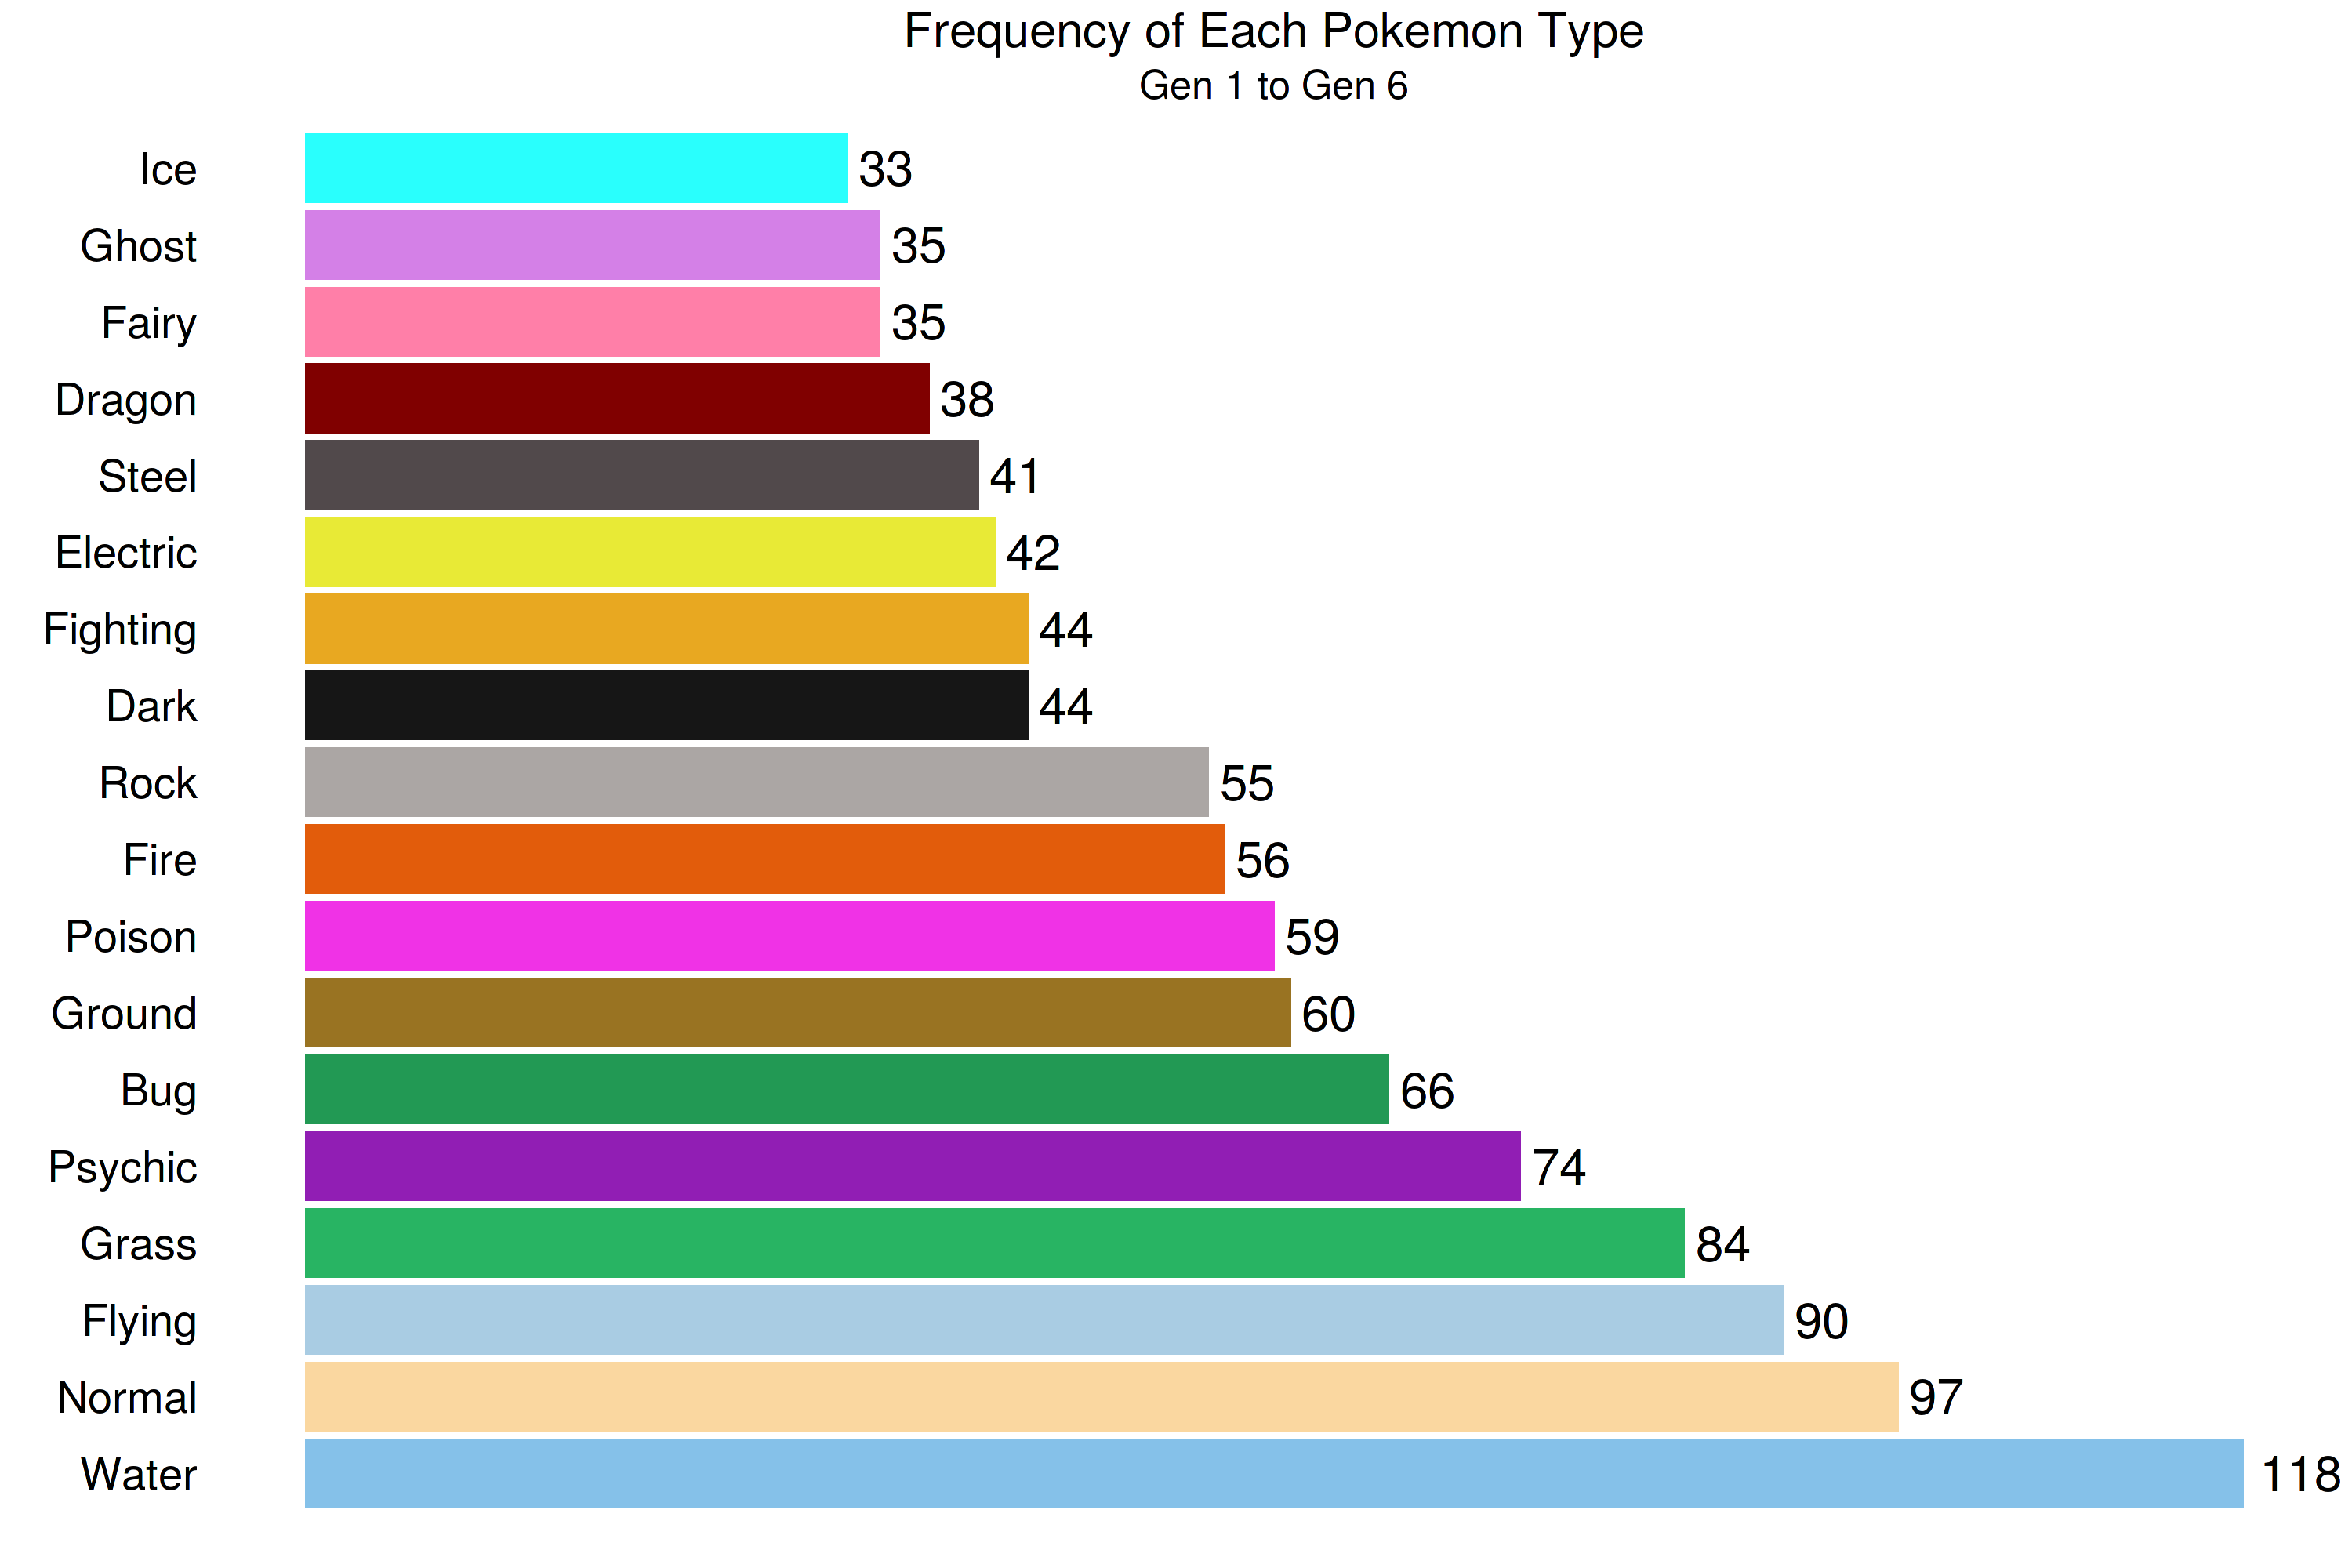

In [200]:
options(repr.plot.res = 200, repr.plot.width=15, repr.plot.height = 10)

cbbPalette <- c('#85C1E9', '#FAD7A0', '#A9CCE3', '#28B463', '#911EB4', 
                '#229954', '#997322', '#f032e6', '#E25C0B', '#ABA6A4', 
                '#161616', '#E8A821', '#E8EA36', '#51494B', '#800000', 
                '#FF7FA8', '#D480E7', '#29FFFD')

p = ggplot(df.long, aes(x=Type, fill=Type))
p = p + geom_bar()
p = p + coord_flip()
p = p + geom_text(stat='count', aes(label=..count..), hjust=-0.2, size=8)
p = p + theme(axis.text.y=element_text(color="black",size=20),axis.text.x=element_blank(),
              legend.position="none",
              plot.title = element_text(size=22, hjust=0.5),
              plot.subtitle = element_text(size=18, hjust=0.5))
p = p + labs(x="", 
             y="",
             subtitle='Gen 1 to Gen 6')
p = p + theme(panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              panel.border = element_blank(),
              panel.background = element_blank(),
              axis.ticks = element_blank())
p = p + scale_fill_manual(values=cbbPalette)
p = p + ggtitle("Frequency of Each Pokemon Type")
p


In [217]:
df.ordinary = df %>%
    filter(Legendary == "FALSE") %>%
    mutate(Same=ifelse(Defense==`Sp. Def`,"TRUE","FALSE"))

df.ordinary %>% head(20)

#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Same
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE,FALSE
4,Charmander,Fire,NA,309,39,52,43,60,50,65,1,FALSE,FALSE
5,Charmeleon,Fire,NA,405,58,64,58,80,65,80,1,FALSE,FALSE
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,FALSE,FALSE
7,Squirtle,Water,NA,314,44,48,65,50,64,43,1,FALSE,FALSE
8,Wartortle,Water,NA,405,59,63,80,65,80,58,1,FALSE,TRUE
9,Blastoise,Water,NA,530,79,83,100,85,105,78,1,FALSE,FALSE


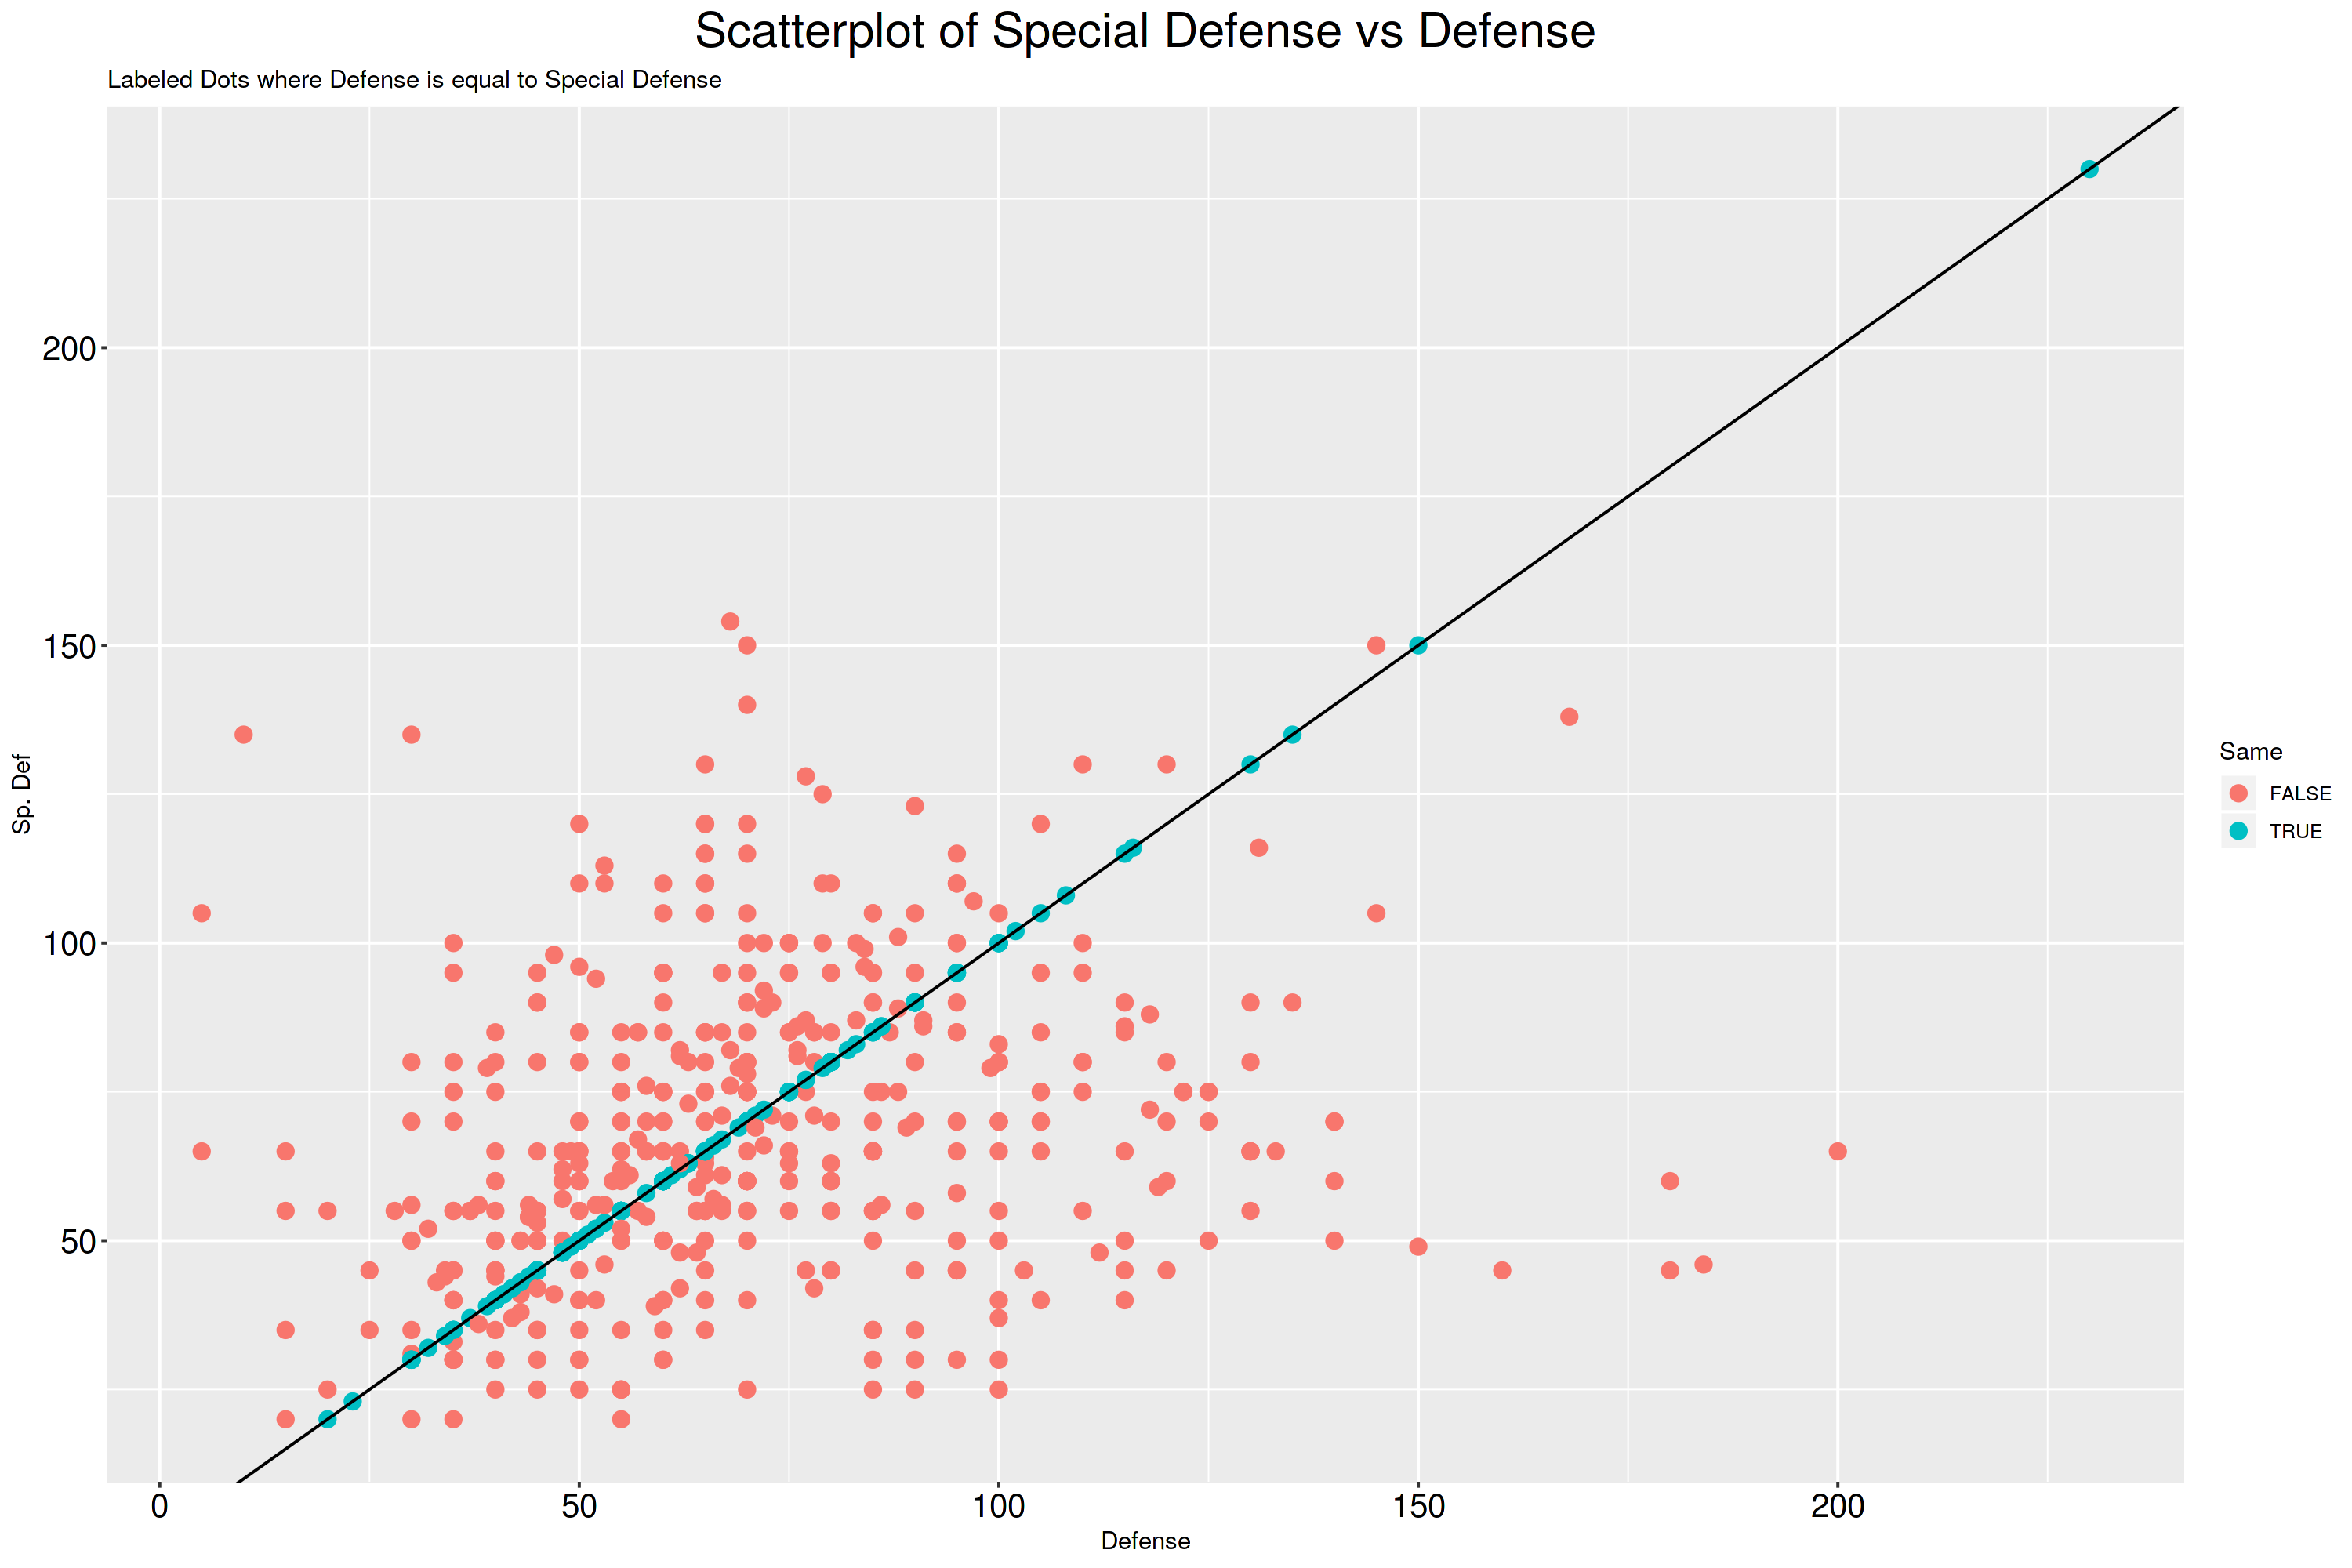

In [228]:
options(repr.plot.res = 200, repr.plot.width=15, repr.plot.height = 10)
p = ggplot(df.ordinary, aes(x=Defense, y=`Sp. Def`, color=Same))
p = p + geom_point(size=3)
p = p + geom_abline(intercept=0, slope=1)
p = p + ggtitle("Scatterplot of Special Defense vs Defense")
p = p + labs(subtitle="Labeled Dots where Defense is equal to Special Defense")
p = p + theme(plot.title = element_text(size=22, hjust=0.5),
              axis.text.y=element_text(color="black",size=15),
              axis.text.x=element_text(color="black",size=15))
# p = p + theme_light()
p